In [6]:
import pandas as pd
import os
import numpy as np
import datetime

from collections import defaultdict
from sklearn.cluster import KMeans
from sklearn import metrics
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
from pymongo import MongoClient
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns', None)


In [6]:
import csv

txt_file = r"dec_temp_new.txt"
csv_file = r"decembercsv.csv"

# use 'with' if the program isn't going to immediately terminate
# so you don't leave files open
# the 'b' is necessary on Windows
# it prevents \x1a, Ctrl-z, from ending the stream prematurely
# and also stops Python converting to / from different line terminators
# On other platforms, it has no effect
in_txt = csv.reader(open(txt_file, "r"), delimiter = '\t')
out_csv = csv.writer(open(csv_file, 'w'))

out_csv.writerows(in_txt)

In [15]:
import pandas as pd
import os
import numpy as np
import datetime

from collections import defaultdict
from sklearn.cluster import KMeans
from sklearn import metrics
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
from pymongo import MongoClient



client=MongoClient('10.129.23.41:27017')
db=client.data
DF = pd.DataFrame()
for flat_name in db.collection_names():
    if flat_name[:7] == 'aravali':
        flat = db[flat_name]
        print(flat_name)
    else:
        continue
    tdf = np.abs(pd.DataFrame(list(flat.find({},{'_id':0,'TS':1,'FwdWh':1}))))
#     print(tdf)
    if 'TS' in tdf:
        tdf = tdf.set_index(['TS'])

        tdf.index = pd.to_datetime(tdf.index, unit='s')
        tdf = tdf['FwdWh'].resample('D').mean()
    #     print(flat_name)
    #     print(tdf)


        DF[flat_name] = (tdf.shift(-1) - tdf)/1000
#     print(DF[flat_name[:-3]])
#     break





print(DF)
# DF=DF.drop(DF.index[[10]])
# DF=DF.drop(DF.index[[30]])

   
# print(DF)



# # print(DF) 

# # plt.plot(sumcon)

# temp = pd.read_csv('novembercsv.csv')
# # temp = temp.drop(temp.index[[29]])
# print(temp)
# sc = list(sumcon)

# temp['con'] = sc
# plt.plot(temp)
# temp.corr().to_csv("November.csv")
# temp.to_csv('november.csv')
# print(temp.corr())
# # sumcon['temp'] = temp['tempavg']
# # sumcon['humid'] = temp['humidavg']

# print(temp)

aravali_25
aravali_244
aravali_243
aravali_234
aravali_211
aravali_233
aravali_247
aravali_238
aravali_37
aravali_228
aravali_223
aravali_36
aravali_4
aravali_21
aravali_35
aravali_34
aravali_226
aravali_10
aravali_237
aravali_26
aravali_227
aravali_218
aravali_23
aravali_17
aravali_5
aravali_242
aravali_224
aravali_229
aravali_245
aravali_29
aravali_221
aravali_209
aravali_18
aravali_214
aravali_27
aravali_6
aravali_24
aravali_225
aravali_246
aravali_1
aravali_200
aravali_207
aravali_219
aravali_16
aravali_210
aravali_3
aravali_28
aravali_31
            aravali_25  aravali_244  aravali_243  aravali_234  aravali_211  \
TS                                                                           
2016-12-19    4.628887     5.979566     0.415371     0.000000     2.703616   
2016-12-20    2.822910     7.911444     2.756793     0.000000     5.970485   
2016-12-21    4.675386     5.064857     6.496549     0.000000     3.405852   
2016-12-22    4.727783     6.487999     5.783598     0.000000

In [17]:
client=MongoClient('127.0.0.1:27017')
db=client.test4
DF = pd.DataFrame()
for flat_name in db.collection_names():
    if flat_name[:7] == 'aravali' and flat_name[-3:] == 'Dec':
        flat = db[flat_name]
#         print(flat_name)
    else:
        continue
    tdf = np.abs(pd.DataFrame(list(flat.find({},{'_id':0,'TS':1,'con':1}))))
#     print(tdf)
    tdf = tdf.set_index(['TS'])
    tdf.index = pd.to_datetime(tdf.index, unit='s')
    tdf = tdf['con'].resample('D').mean()
#     print(flat_name[:-3])
#     print(tdf)
    
    DF[flat_name[:-3]] = (tdf.shift(-1) - tdf)/1000
print(DF)

            aravali_25  aravali_244  aravali_243  aravali_234  aravali_211  \
TS                                                                           
2016-11-30    3.315682     5.774477     8.259379          NaN     0.751125   
2016-12-01    2.866485     8.815210    11.541371          NaN          NaN   
2016-12-02         NaN     6.412102     7.352590     6.653395          NaN   
2016-12-03         NaN          NaN          NaN          NaN          NaN   
2016-12-04         NaN          NaN          NaN          NaN          NaN   
2016-12-05         NaN          NaN          NaN          NaN          NaN   

            aravali_212  aravali_247  aravali_208  aravali_37  aravali_228  \
TS                                                                           
2016-11-30          0.0     3.402695          0.0    4.711494      0.98151   
2016-12-01          NaN     5.982862          NaN    4.660714          NaN   
2016-12-02          NaN     5.214290          NaN         NaN  

0     174.622945
1     252.823811
2     217.978537
3     221.248797
4     190.018723
5     180.380775
6     168.312923
7     109.410048
8     273.763894
9     123.781165
10    185.414008
11    177.825420
12    172.699932
13    223.250034
14    167.758410
15    199.917341
16      0.000000
17      0.000000
18      0.000000
19     83.926368
20    382.502353
21    144.638214
22    226.915389
23    128.468485
24    221.646827
25    246.339851
26    226.077852
27    225.145905
28    137.157866
29      0.000000
30      0.000000
31      0.000000
32    172.128512
33    193.691023
34    212.506123
35    155.086738
36      0.000000
37      0.000000
38      0.000000
39      0.000000
40      0.000000
41      0.000000
42    224.567157
43    198.535904
44    235.070969
45    184.252299
46    125.943894
47    187.970495
48    166.295887
49    159.229618
50    190.359482
51    220.271328
52    192.674896
53    214.139606
54    210.002934
55    185.025959
56    133.120256
57      0.000000
58      0.0000

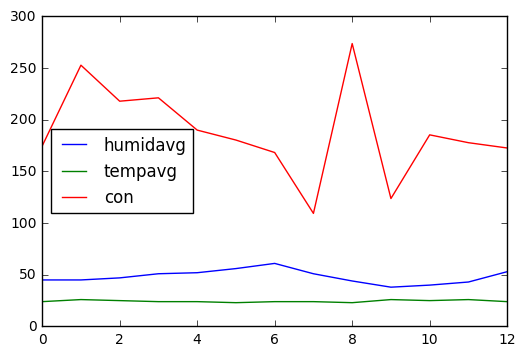

In [7]:
# print(DF.head())
# DF.to_csv("new_mongo_aravali.csv")
DF = pd.read_csv("new_mongo_aravali.csv")
# print(DF)
# # del DF['aravali_3']
# DF = DF.drop('aravali_3', 1)
# # del DF['aravali_208']
# del DF['aravali_234']
# # del DF['aravali_11']
# del DF['aravali_238']
# # del DF['aravali_22']
# # del DF['aravali_212']
# del DF['aravali_10']
# del DF['aravali_233']
# del DF['aravali_224']
# del DF['aravali_1']
# del DF['aravali_247']
# DF[DF < 0] = 0
# DF = DF.replace([np.inf, -np.inf], np.nan)
DF.round(2)
sumcon = DF.sum(axis=1) 
print(sumcon)
temp = pd.read_csv('decembercsv.csv')

# # temp = temp.drop(temp.index[[29]])
# print(temp)
sc = list(sumcon)
print(temp.shape)
print(len(sc))
print("max = ", max(sc[:13]) , min(list(filter((0.0).__ne__, sc[:13]))))
temp['con'] = sc[:13]
temp.plot()
# plt.show()
plt.savefig('Dec.png')
temp.corr().to_csv("December.csv")
temp.to_csv('december.csv')
print(temp.corr())